In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [5]:
digits = load_digits()

In [6]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [7]:
#Image is represented as one dimensional array
#Total number of elements is 64 which represents 8 bits
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

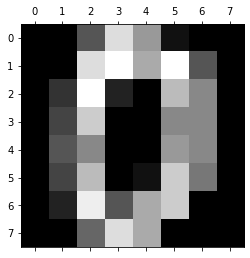

In [8]:
plt.gray()
plt.matshow(digits.images[0])

<Figure size 432x288 with 0 Axes>

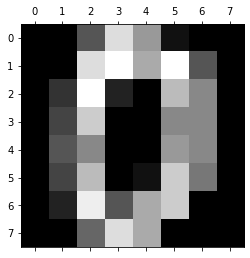

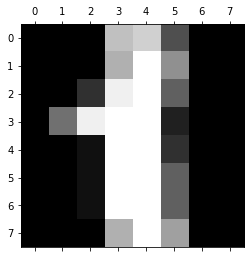

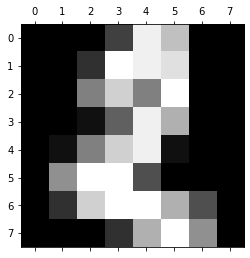

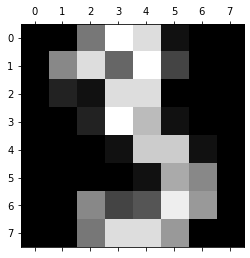

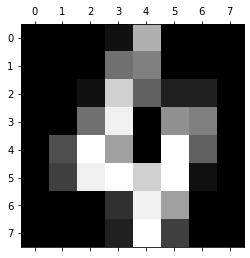

In [9]:
#Print first 5 

plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [10]:
#Let's have a look at the target values

digits.target[0:5]

array([0, 1, 2, 3, 4])

In [11]:
#Before model building we need train and test split

from sklearn.model_selection import train_test_split

In [13]:
#First argument is dataset, second argument is target variable
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.2)

In [14]:
len(X_train)

1437

In [15]:
len(X_test)

360

In [37]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs',dual=False, max_iter = 7000)
#solver='lbfgs', max_iter=3000,

In [38]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=7000)

In [42]:
model.score(X_test, y_test)

0.9638888888888889

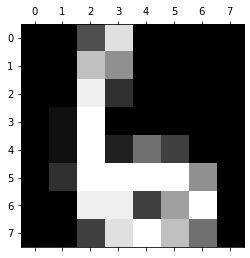

In [44]:
plt.matshow(digits.images[67])

In [45]:
digits.target[67]

6

In [46]:
model.predict([digits.data[67]])

array([6])

In [47]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [48]:
y_predicted = model.predict(X_test)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predicted)

cm

array([[33,  0,  1,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 36,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 36,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 40,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 38,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 30,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  2,  0, 38,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 38,  0,  0],
       [ 0,  0,  1,  0,  0,  1,  0,  0, 30,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 28]], dtype=int64)

Text(69.0, 0.5, 'Truth')

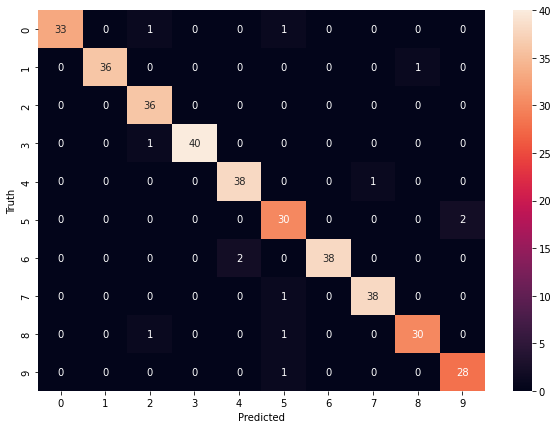

In [49]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
